# Soybean production in Asia and Latin America: 
## An analysis of SPAM2010 data

##  1. Introduction

Feeding a growing population, climate change and biodiversiy loss: these belong to the greatest challenges we are facing today. The use of agricultural land plays one of the utmost important roles in all of those. Hence, gathering knowledge on global agricultural production and understanding its supply chains can support the way towards a sustainable future. 
SPAM (SPatial Production Allocation Model) follows a cross-entropy approach for generating crop distribution estimates in disaggregated units (https://www.mapspam.info/). Using the model's output, we can make estimates of the physical area of crop production.  

In [1]:
#import libraries
library(sp)
library(raster)
library(rgdal)
library(dplyr)  
library(leaflet)
library(geojsonR)
library(utils)
library(gridExtra)
library(ggplot2)

rgdal: version: 1.4-4, (SVN revision 833)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/julia/anaconda3/envs/r-tutorial/Lib/R/library/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/julia/anaconda3/envs/r-tutorial/Lib/R/library/rgdal/proj
 Linking to sp version: 1.3-1 

Attaching package: 'dplyr'

The following objects are masked from 'package:raster':

    intersect, select, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  

In [2]:
#set up system
folder = "SPAM_data"
if (file.exists(folder)){
    setwd(folder)
} else {
    dir.create(folder)
    setwd(folder)
}

# 2. Area of interest
Soybean is an important source for protein and oil, and knowledge on its production can support guiding supply chains to more sustainability. Brazil and India belong to the countries with the highest rates of soybean production in the world (Pagano & Miransari, 2016). We will look into two regions in Latin America and Asia that comprise large production areas of soybean. 

In [3]:
#retrieve AOI 
if (file.exists("areas.geojson")){
    print("File already exists.")
} else {
    download.file('https://raw.githubusercontent.com/Vizzuality/science-code-challenge/main/areas.geojson', destfile="areas.geojson")
    print("File downloaded.")
}

[1] "File already exists."


In [4]:
#read AOI and visualise
aoi  <- readOGR("areas.geojson")
crs(aoi)
m <- leaflet() %>%
  addTiles %>%
  addPolygons(data = aoi, color = "#444444", weight = 1, smoothFactor = 0.5,
    opacity = 0.5, fillOpacity = 0.3)
m

OGR data source with driver: GeoJSON 
Source: "C:\Users\julia\SPAM_data\areas.geojson", layer: "areas"
with 2 features
It has 0 fields


CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 

HTML widgets cannot be represented in plain text (need html)

# 3. Data
For the analysis, we download the global SPAM2010 data on the physical areas of crop production. The data contains several GEOTIFF files, one for each crop farming system ("technology") and one combining all together. Looking at the global map, we see that our two areas of interest comprise some of the hotspots of soybean production in the world.

In [5]:
#download SPAM data

#GEOTIFF
if (file.exists("spam2010v2r0_global_phys_area.geotiff.zip")){
    print("GEOTIFF already exists.")
} else {
    download.file("https://s3.amazonaws.com/mapspam/2010/v2.0/geotiff/spam2010v2r0_global_phys_area.geotiff.zip", destfile="spam2010v2r0_global_phys_area.geotiff.zip")
    print("GEOTIFF downloaded.")
}

[1] "GEOTIFF already exists."


In [6]:
#extract all relevant files of soybean

#GEOTIFF
technologies <- c("A", "I", "H", "L", "S")
file_names  <- c()
for (i in technologies){
    file_name <- paste0("spam2010V2r0_global_A_SOYB_", i, ".tif")
    file_names  <- c(file_names, file_name)
    if (file.exists(file_name)){
        print(paste("File", file_name, "already exists."))
    } else {
        unzip("spam2010v2r0_global_phys_area.geotiff.zip", file_name)
        print(paste("File", file_name, "extracted."))
    }   
}  

[1] "File spam2010V2r0_global_A_SOYB_A.tif already exists."
[1] "File spam2010V2r0_global_A_SOYB_I.tif already exists."
[1] "File spam2010V2r0_global_A_SOYB_H.tif already exists."
[1] "File spam2010V2r0_global_A_SOYB_L.tif already exists."
[1] "File spam2010V2r0_global_A_SOYB_S.tif already exists."


CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 

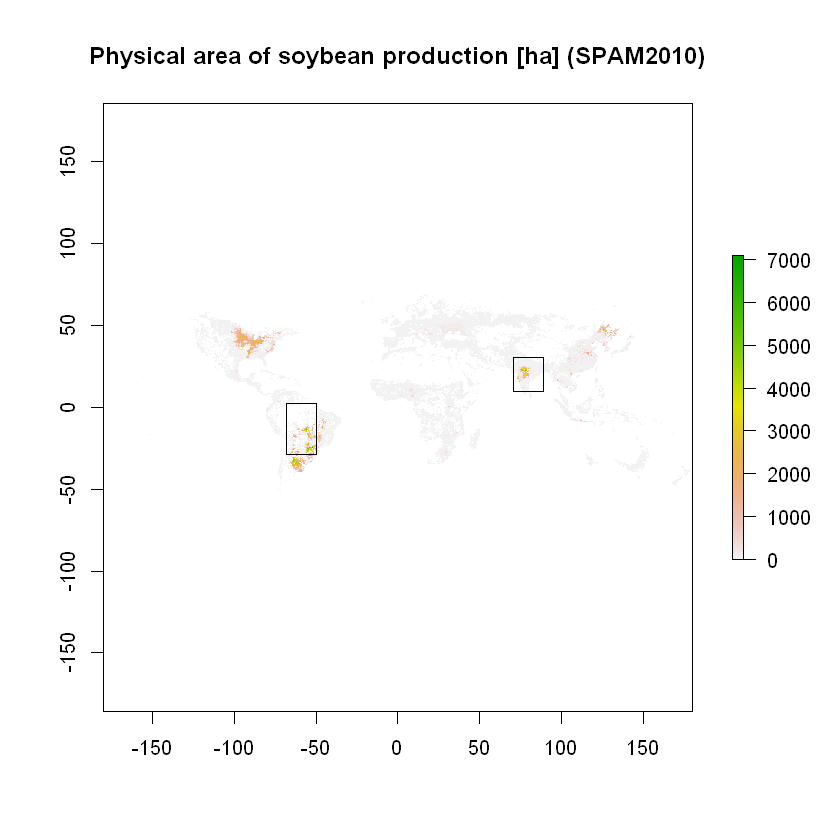

In [7]:
#first exploration of global raster dataset
soyb_A  <- raster("spam2010V2r0_global_A_SOYB_A.tif")
crs(soyb_A) #check if coordinate system is the same as AOI
plot(soyb_A, main="Physical area of soybean production [ha] (SPAM2010)")
plot(aoi, add=T)

# 4. Analysis
Let's look at the different farming systems of soybean for each site.

### 4.1 AOI "Asia" 
In the "Asia" area of interest we see that most of the soybean production area is farmed in rainfed high-input systems. The hotspot area is the area around Madhya Pradesh, which is known for its soybean production (De et al., 2001). Only 0.03% of the production area is rainfed subsistence, clustering in the north of the area of interest. Rainfed subsistence is classified as unsuitable cropland area, where soybean farming still exists (Yu et al., 2020). This area is mostly used for personal consumption. Irrigation makes up only 0.66% of the total production area.

### 4.2 AOI "Latin America"
In the AOI "Latin America", rainfed subsistence is non-existant, while rainfed high-input and rainfed low-input make up about half of the production area each. Irrigated area makes up only 0.22% of the total production area. 

In [8]:
#load rasters of all technologies into one stack
raster_names  <- c()
for (i in technologies){
    raster_name_to_add  <- paste0("soyb_", i)
    raster_names  <- c(raster_names, raster_name_to_add)
}
all_rasters  <- stack(file_names)
names(all_rasters)  <- raster_names

#clip raster stack to each AOI
aoi_Asia  <- aoi[1,]
aoi_LA  <- aoi[2,]

all_rasters_Asia  <- crop(all_rasters, aoi_Asia)
all_rasters_Asia  <- mask(all_rasters_Asia, aoi_Asia)

all_rasters_LA  <- crop(all_rasters, aoi_LA) 
all_rasters_LA  <- mask(all_rasters_LA, aoi_LA)

Warning message in colors(.):
"Some values were outside the color scale and will be treated as NA"Warning message in colors(.):
"Some values were outside the color scale and will be treated as NA"

HTML widgets cannot be represented in plain text (need html)
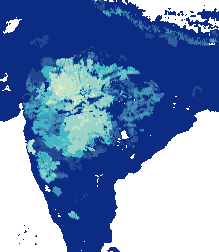
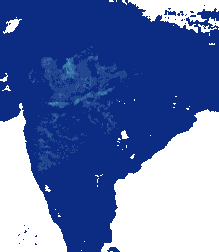
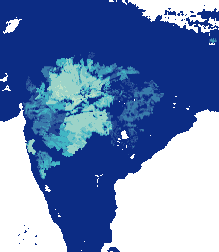
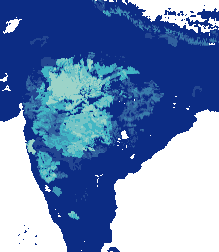
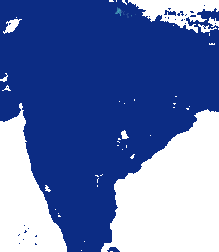

In [9]:
#create interactive map for AOI "Asia"
brks  <- c(5, 10, 50, 100, 150, 200, 10000)
col_regions  <- c('#FF0000FF', '#FF3300FF', '#FF6600FF', '#FF9900FF', '#FFCC00FF', '#FFFF00FF', '#FFFF80FF')

pal <- colorBin(c("#0C2C84", "#41B6C4", "#FFFFCC"), values(all_rasters_Asia$soyb_A),
  na.color = "transparent", bins=c(0,5,20,50,100,200,500,1000,3000,5000,7000,10000))  #here should go a quantile function instead

groups  <- c("All technologies", "Irrigation", "Rainfed high-input", "Rainfed low-input", "Rainfed subsistence")
m_asia <- leaflet() %>%
  addTiles() %>%  # Add default OpenStreetMap map tiles
  #addRasterImage(all_rasters_Asia[[1]], colors = pal, opacity = 0.8, group = groups[1]) %>%
  addRasterImage(all_rasters_Asia$soyb_A, colors=pal,opacity = 0.8, group = groups[1]) %>%
  addRasterImage(all_rasters_Asia$soyb_I, colors=pal,opacity = 0.8, group = groups[2]) %>%
  addRasterImage(all_rasters_Asia$soyb_H, colors=pal,opacity = 0.8, group = groups[3]) %>%
  addRasterImage(all_rasters_Asia$soyb_L, colors=pal,opacity = 0.8, group = groups[4]) %>%
  addRasterImage(all_rasters_Asia$soyb_S, colors=pal,opacity = 0.8, group = groups[5]) %>%
  addLegend(pal = pal, values = values(all_rasters_Asia$soyb_A), title = "Soybean production [ha]") %>%
  addLayersControl(
    baseGroups = groups,
    options = layersControlOptions(collapsed = FALSE)
  )
            
m_asia  # Print the map


Warning message in colors(.):
"Some values were outside the color scale and will be treated as NA"Warning message in colors(.):
"Some values were outside the color scale and will be treated as NA"Warning message in colors(.):
"Some values were outside the color scale and will be treated as NA"Warning message in colors(.):
"Some values were outside the color scale and will be treated as NA"

HTML widgets cannot be represented in plain text (need html)
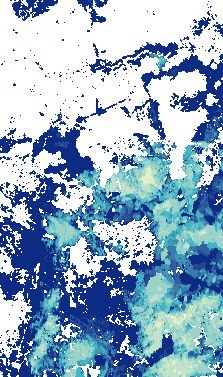
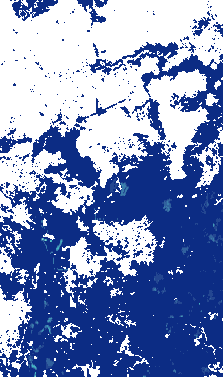
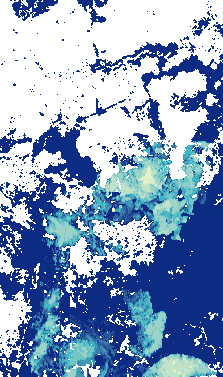
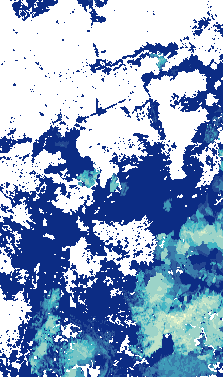
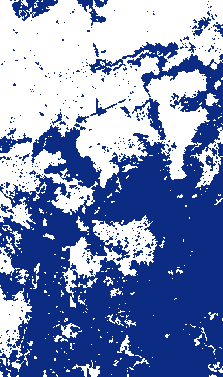

In [12]:
#create interactive map for AOI "LA"
brks  <- c(5, 10, 50, 100, 150, 200, 10000)
col_regions  <- c('#FF0000FF', '#FF3300FF', '#FF6600FF', '#FF9900FF', '#FFCC00FF', '#FFFF00FF', '#FFFF80FF')

pal <- colorBin(c("#0C2C84", "#41B6C4", "#FFFFCC"), values(all_rasters_LA$soyb_A),
  na.color = "transparent", bins=c(0,5,20,50,100,200,500,1000,3000,5000,7000,10000)) #here should go a quantile function instead

groups  <- c("All technologies", "Irrigation", "Rainfed high-input", "Rainfed low-input", "Rainfed subsistence")
m_LA <- leaflet() %>%
  addTiles() %>%  # Add default OpenStreetMap map tiles
  addRasterImage(all_rasters_LA$soyb_A, colors=pal,opacity = 0.8, group = groups[1]) %>%
  addRasterImage(all_rasters_LA$soyb_I, colors=pal,opacity = 0.8, group = groups[2]) %>%
  addRasterImage(all_rasters_LA$soyb_H, colors=pal,opacity = 0.8, group = groups[3]) %>%
  addRasterImage(all_rasters_LA$soyb_L, colors=pal,opacity = 0.8, group = groups[4]) %>%
  addRasterImage(all_rasters_LA$soyb_S, colors=pal,opacity = 0.8, group = groups[5]) %>%
  addLegend(pal = pal, values = values(all_rasters_LA$soyb_A), title = "Soybean production [ha]") %>%
  addLayersControl(
    baseGroups = groups,
    options = layersControlOptions(collapsed = FALSE)
  )
            
m_LA  # Print the map


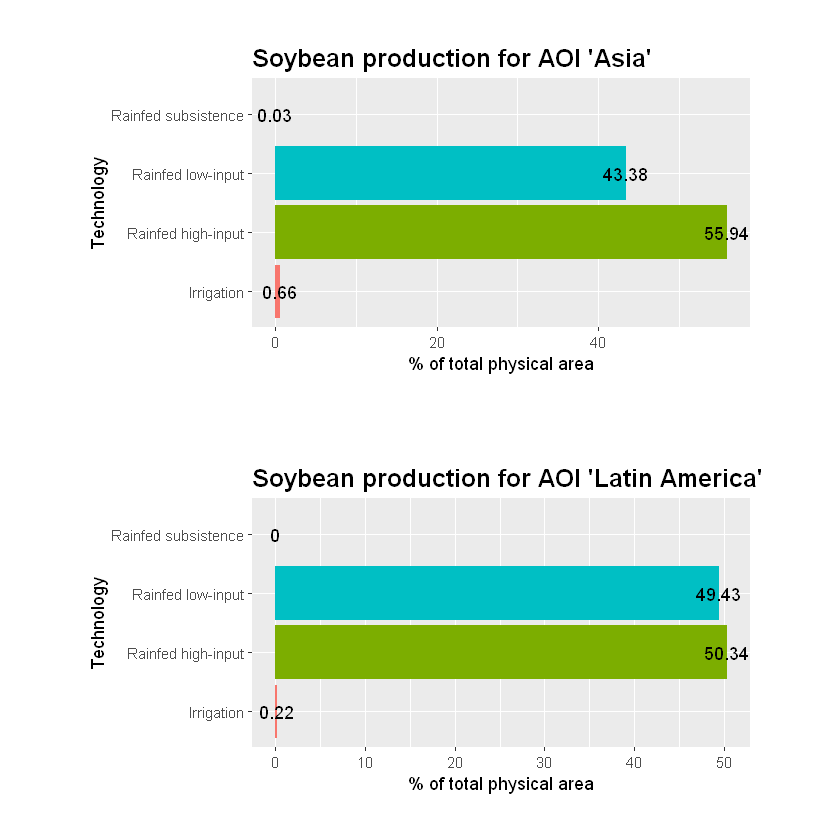

In [14]:
#calculate statistics + create bar chart

#calculate sum and percentils
rasters_Asia_for_stats  <- subset(all_rasters_Asia, c(2:5))
rasters_Asia_for_stats_sum  <- cellStats(rasters_Asia_for_stats, 'sum')

rasters_LA_for_stats  <- subset(all_rasters_LA, c(2:5))
rasters_LA_for_stats_sum  <- cellStats(rasters_LA_for_stats, 'sum')

lbls  <- c("Irrigation", "Rainfed high-input", "Rainfed low-input", "Rainfed subsistence")
data_Asia  <- data.frame(technology = lbls, values=rasters_Asia_for_stats_sum)
data_LA  <- data.frame(technology = lbls, values=rasters_LA_for_stats_sum)
total_sum_Asia  <- sum(data_Asia$values)
total_sum_LA  <- sum(data_LA$values)

data_Asia$pct  <- round(data_Asia$values/total_sum_Asia*100, digits=2)
data_LA$pct <- round(data_LA$values/total_sum_LA*100, digits=2)

#create plots
#dev.new(width = 8, height = 4, unit = "cm")
barchart_Asia  <-  ggplot(data_Asia, aes(technology, pct, fill=technology)) +
  geom_col() +
  ggtitle("Soybean production for AOI 'Asia'") +
  theme(aspect.ratio = 0.5, legend.position = "none", plot.margin=unit(c(1,1,1,1), "cm"),  
        plot.title = element_text(size=15, face="bold")) +
  geom_text(aes(label = pct)) +
  labs(x = "Technology", y = "% of total physical area")+
  coord_flip(clip="off")

barchart_LA  <-  ggplot(data_LA, aes(technology, pct, fill=technology)) +
  geom_col() +
  ggtitle("Soybean production for AOI 'Latin America'") +
  theme(aspect.ratio = 0.5, legend.position = "none", plot.margin=unit(c(1,1,1,1), "cm"), 
       plot.title = element_text(size=15, face="bold")) +
  geom_text(aes(label = pct))+
  labs(x = "Technology", y = "% of total physical area")+
  coord_flip(clip="off")

grid.arrange(barchart_Asia, barchart_LA, nrow=2)

### 4.3 Comparison of the area of interests
Brasil and India are among the biggest soy producers worldwide. The history of soy production in both countries can be traced back up several decades. The SPAM model output shows that irrigation plays a minor role in both areas of interest. Rainfed high- as well as low-input play the biggest role in the soybean production. Hence, farming for cash crops (high-input) as well as for personal consumption (low-input) is of importance in those areas. Significant advancement in technology and better allocation of resources could lead to an increase in productivity up to 40% more than current yields in the region of Madhya Pradesh (De et al., 2001). 

Undeniably, soy production has helped in economical development of rural area. However, at the same time it has caused environmental degradation of natural resources  and concentration of power to the benefit of few people (Russo Lopes et al., 2021). With climate change pressure, suitable areas might reduce in both Brazil and India (Soares et al., 2021), and hence, strategies towards climate smart farming should be put in focus, that are sustainable for the environment and people.

# References

De, Dipankar, R.S Singh, and Hukum Chandra (2001): ‘Technological Impact on Energy Consumption in Rainfed Soybean Cultivation in Madhya Pradesh’. Applied Energy 70, no. 3: 193–213.

Marcela Claudia Pagano, Mohammad Miransari (2016): 1 - The importance of soybean production worldwide, Editor(s): Mohammad Miransari: Abiotic and Biotic Stresses in Soybean Production, Academic Press, Pages 1-26, ISBN 9780128015360

Russo Lopes, Gabriela, Mairon G. Bastos Lima, and Tiago N.P. dos Reis (2021): ‘Maldevelopment Revisited: Inclusiveness and Social Impacts of Soy Expansion over Brazil’s Cerrado in Matopiba’. World Development 139: 105316.


Soares, João Rafael Silva, Rodrigo Soares Ramos, Ricardo Siqueira da Silva, Daniel Victor Chaves Neves, and Marcelo Coutinho Picanço (2021): ‘Climate Change Impact Assessment on Worldwide Rain Fed Soybean Based on Species Distribution Models’. Tropical Ecology. 

Yu, Q., You, L., Wood-Sichra, U., Ru, Y., Joglekar, A.K.B., Fritz, S., Xiong, W., Lu, M., Wu, W., Yang, P. (2020): A cultivated planet in 2010—Part 2: The global gridded agricultural-production maps. Earth Syst. Sci. Data, 12, 3545–3572.